In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('train.csv')

In [33]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [34]:
df.shape

(9800, 18)

In [35]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [36]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [37]:
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

In [38]:
df.isnull().sum()

Row ID            0
Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [39]:
df.dropna(subset=["Postal Code"], inplace=True)

In [40]:
df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## EDA

In [41]:
Top_category = df.groupby(["Category"])[["Sales"]].sum().sort_values("Sales", ascending=False)  # Sort the Categories as per the sales
Top_category = Top_category[["Sales"]] # keep only the sales column in the dataframe
total_revenue_category = Top_category["Sales"].sum() # To find the total revenue generated as per category
total_revenue_category = str(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
Top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

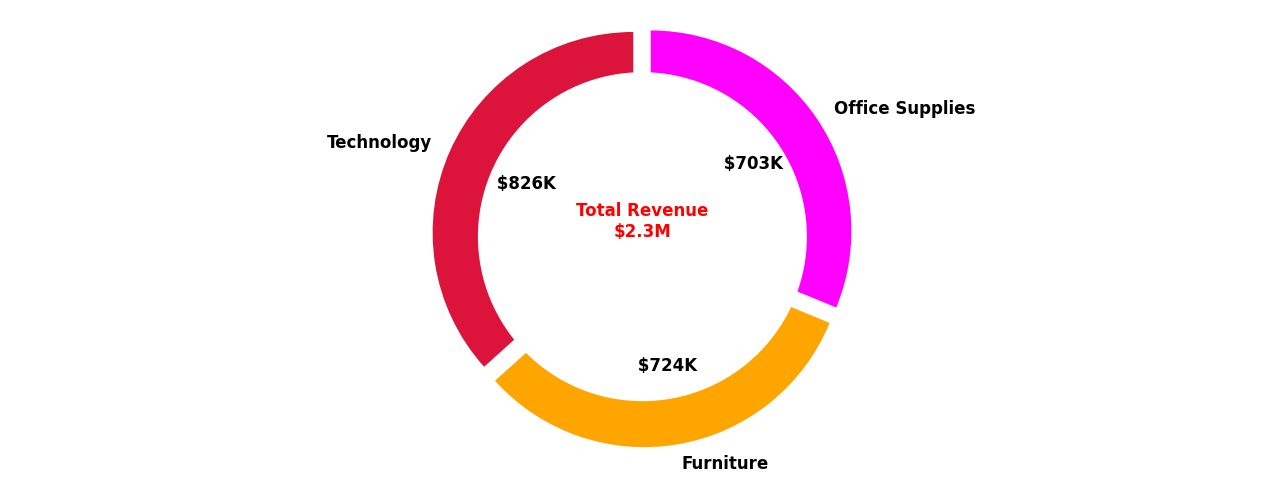

In [42]:
import matplotlib.pyplot as plt

# Set figure and font parameters
plt.rcParams["figure.figsize"] = (13, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

# Format function to display revenue in thousands (K)
def autopct_format_thousands(values):
    def my_format(pct):
        total = sum(values)
        val = round(pct * total / 100.0 / 1_000)  # Convert to thousands and round
        return f' ${val}K'
    return my_format

# Define colors and explode effect for the pie chart
colors = ['crimson', 'orange', 'magenta']
explode = (0.05, 0.05, 0.05)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(
    Top_category['Sales'],
    colors=colors,
    labels=Top_category['Category'],
    autopct=autopct_format_thousands(Top_category['Sales']),
    startangle=90,
    explode=explode
)

# Add a circle at the center for a "donut" effect
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig.gca().add_artist(centre_circle)

# Display the total revenue in millions at the center of the pie chart
total_revenue = Top_category['Sales'].sum() / 1_000_000
ax.annotate(f'Total Revenue\n${total_revenue:.1f}M', color='red', xy=(0, 0), fontsize=12, ha="center")

# Set equal aspect ratio to keep the pie chart circular
ax.axis('equal')
plt.tight_layout()
plt.show()

In [43]:
Top_products = df.groupby(["Product Name"])[["Sales"]].sum().sort_values("Sales",ascending=False).head(8) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = str(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products 

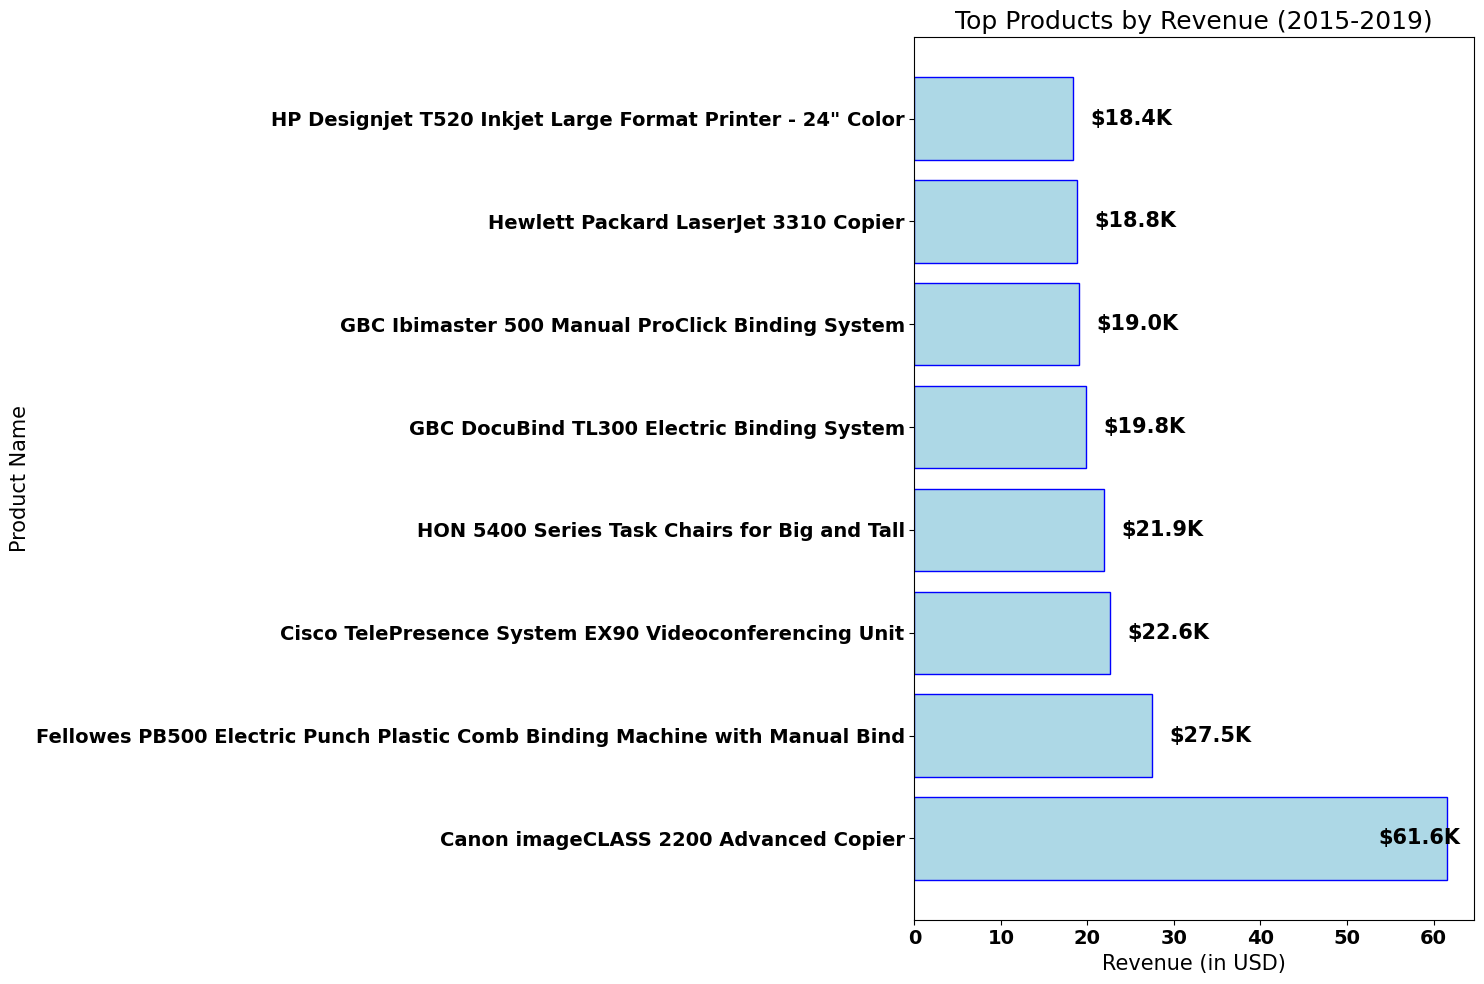

In [44]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Set the title and axis labels with font sizes
plt.title("Top Products by Revenue (2015-2019)", fontsize=18)
plt.xlabel("Revenue (in USD)", fontsize=15)
plt.ylabel("Product Name", fontsize=15)

# Create a horizontal bar chart with named colors
plt.barh(Top_products["Product Name"], Top_products["Sales"] / 1000, color='lightblue', edgecolor='blue', linewidth=1)

# Customize the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add revenue values on each bar with conditional positioning
for index, revenue in enumerate(Top_products["Sales"]):
    product_name = Top_products["Product Name"].iloc[index]
    revenue_k = revenue / 1000  # Convert revenue to thousands
    # Adjust placement based on revenue
    if revenue > 60000:
        plt.text(revenue_k - 8, index, f'${revenue_k:.1f}K', fontsize=15, va='center', color='black')  # Inside the bar
    else:
        plt.text(revenue_k + 2, index, f'${revenue_k:.1f}K', fontsize=15, va='center', color='black')  # Outside the bar

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

Let's find out who are the Most Valuable customers!
The Most Valuable Customers are the customers who are the most profitable for a company.
These customers buy more or higher-value products than the average customer.

In [45]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category'])[["Sales"]].sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

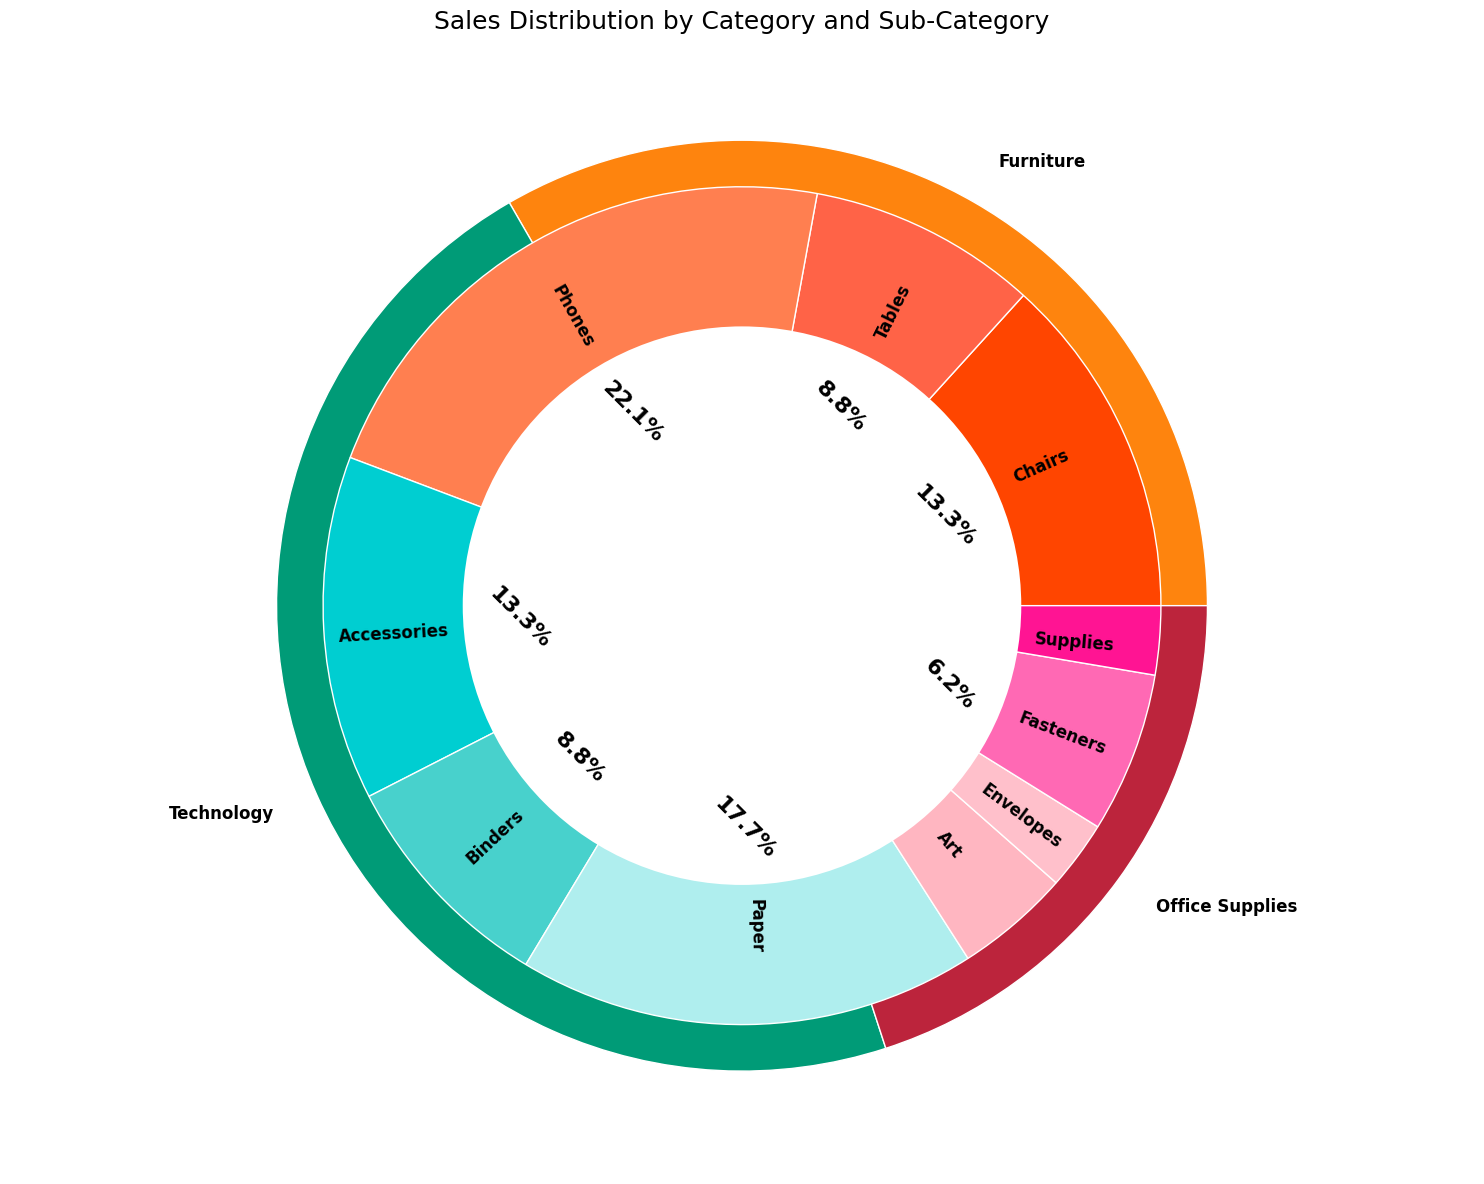

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for main categories and their sales
Top_subcat_1 = pd.DataFrame({
    'Category': ['Furniture', 'Technology', 'Office Supplies'],
    'Sales': [5000, 7000, 3000]
})

# Sample data for sub-categories and their sales
Top_subcat = pd.DataFrame({
    'Sub-Category': ['Chairs', 'Tables', 'Phones', 'Accessories', 
                     'Binders', 'Paper', 'Art', 'Envelopes', 
                     'Fasteners', 'Supplies'],
    'Sales': [1500, 1000, 2500, 1500, 1000, 2000, 500, 300, 700, 300]
})

# Function to show percentages on pie chart only if they're greater than 5%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 5 else ''  # Only show percentage if it's above 5%

# Set the size of the chart
plt.rcParams["figure.figsize"] = (15, 12)

# Create figure and axis
fig, ax = plt.subplots()
ax.axis('equal')  # Make sure the pie chart is a circle

# Define colors for the outer and inner pies
outer_colors = ['#FE840E', '#009B77', '#BC243C']
inner_colors = ['Orangered', 'tomato', 'coral', 'darkturquoise', 
                'mediumturquoise', 'paleturquoise', 'lightpink', 
                'pink', 'hotpink', 'deeppink']

# Set the width for the inner pie (makes it a donut chart)
width = 0.1

# Draw the outer pie chart for main categories
pie = ax.pie(Top_subcat_1['Sales'], 
             radius=1,  # Outer radius
             labels=Top_subcat_1['Category'],  # Main category labels
             colors=outer_colors,  # Colors for main categories
             wedgeprops=dict(edgecolor='w'))  # White edge between slices

# Draw the inner pie chart for sub-categories with percentage labels
pie2 = ax.pie(Top_subcat['Sales'], 
              radius=1 - width,  # Slightly smaller radius for inner pie
              labels=Top_subcat['Sub-Category'],  # Sub-category labels
              autopct=autopct_format,  # Show percentage only if > 5%
              labeldistance=0.7,  # Distance of labels from center
              colors=inner_colors,  # Colors for sub-categories
              wedgeprops=dict(edgecolor='w'),  # White edge between slices
              pctdistance=0.53,  # Distance of percentage text from center
              rotatelabels=True)  # Rotate labels for better fit

# Adjust font size and rotation for the percentage text on inner pie chart
for text in pie2[2]:  # pie2[2] contains the percentage texts
    text.set_fontsize(16)  # Increase font size for better readability
    text.set_rotation(315)  # Rotate the text to fit nicely

# Add a white circle at the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.6, fc='white')  # 0.6 radius white circle
fig.gca().add_artist(centre_circle)  # Add the circle to the chart

# Add a title to give context to the chart
plt.title("Sales Distribution by Category and Sub-Category", fontsize=18)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


In [47]:
Top_customers=df.groupby(['Customer Name'])[["Sales"]].sum().sort_values('Sales', ascending=False).head(15)
Top_customers = Top_customers[["Sales"]].round(2)
Top_customers.reset_index(inplace=True)

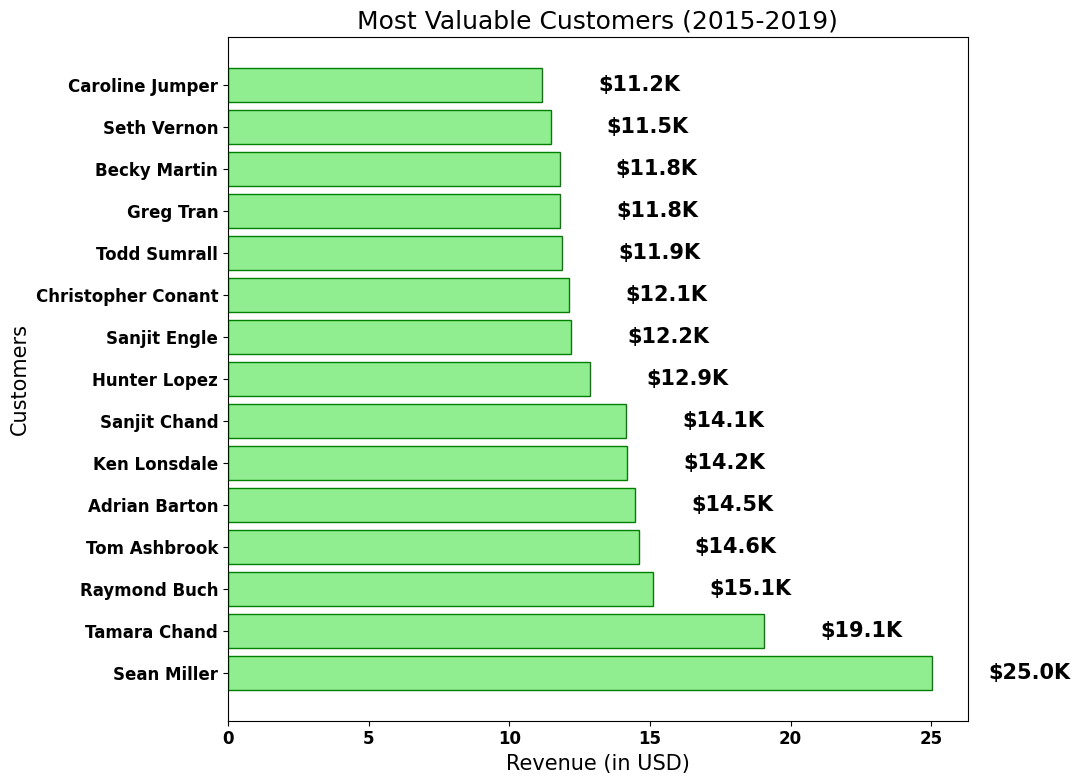

In [48]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(11, 8))

# Set the title and axis labels with font sizes
plt.title("Most Valuable Customers (2015-2019)", fontsize=18)
plt.xlabel("Revenue (in USD)", fontsize=15)
plt.ylabel("Customers", fontsize=15)

# Create a horizontal bar chart with named colors
plt.barh(Top_customers["Customer Name"], Top_customers["Sales"] / 1000, color='lightgreen', edgecolor='green', linewidth=1)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add revenue values on each bar in thousands (K)
for index, revenue in enumerate(Top_customers["Sales"]):
    revenue_k = revenue / 1000  # Convert revenue to thousands
    plt.text(revenue_k + 2, index, f'${revenue_k:.1f}K', fontsize=15, va='center', color='black')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

Let's find out which states generated the highest revenue!
Here are the Top 10 States which generated the highest revenue

In [49]:
Top_states=df.groupby(['State'])[["Sales"]].sum().sort_values('Sales', ascending=False).head(20)
Top_states = Top_states[["Sales"]].round(2) 
Top_states.reset_index(inplace=True)

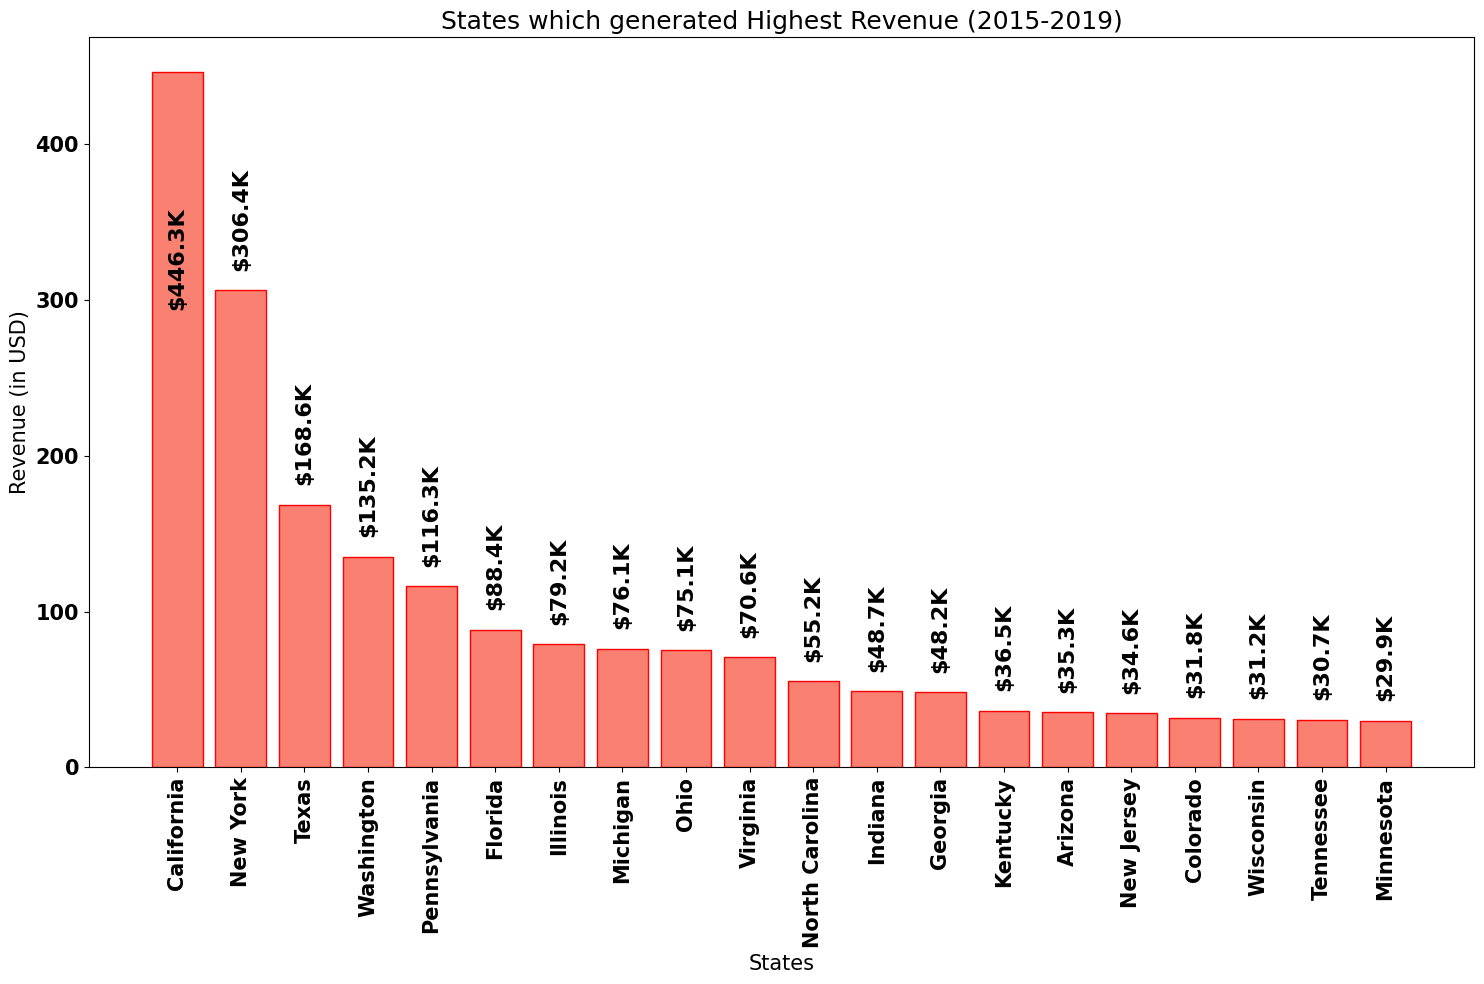

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Set the title and axis labels with font sizes
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18)
plt.xlabel("States", fontsize=15)
plt.ylabel("Revenue (in USD)", fontsize=15)

# Create a bar chart with named colors
plt.bar(Top_states["State"], Top_states["Sales"] / 1000, color='salmon', edgecolor='red', linewidth=1)

# Customize the tick labels
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

# Add revenue values on each bar in thousands (K)
for state, revenue in Top_states["Sales"].items():
    revenue_k = revenue / 1000  # Convert revenue to thousands
    offset = -150 if revenue > 400000 else 15  # Adjust offset for K-scale
    plt.text(state, revenue_k + offset, f'${revenue_k:.1f}K', fontsize=16, rotation=90, ha='center', color='black')

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()

Let's find out which cities generated highest revenue!
Here are the top 20 cities which generated the highest revenue

In [51]:
Top_cities = df.groupby(["City"])[["Sales"]].sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_cities.reset_index(inplace=True)

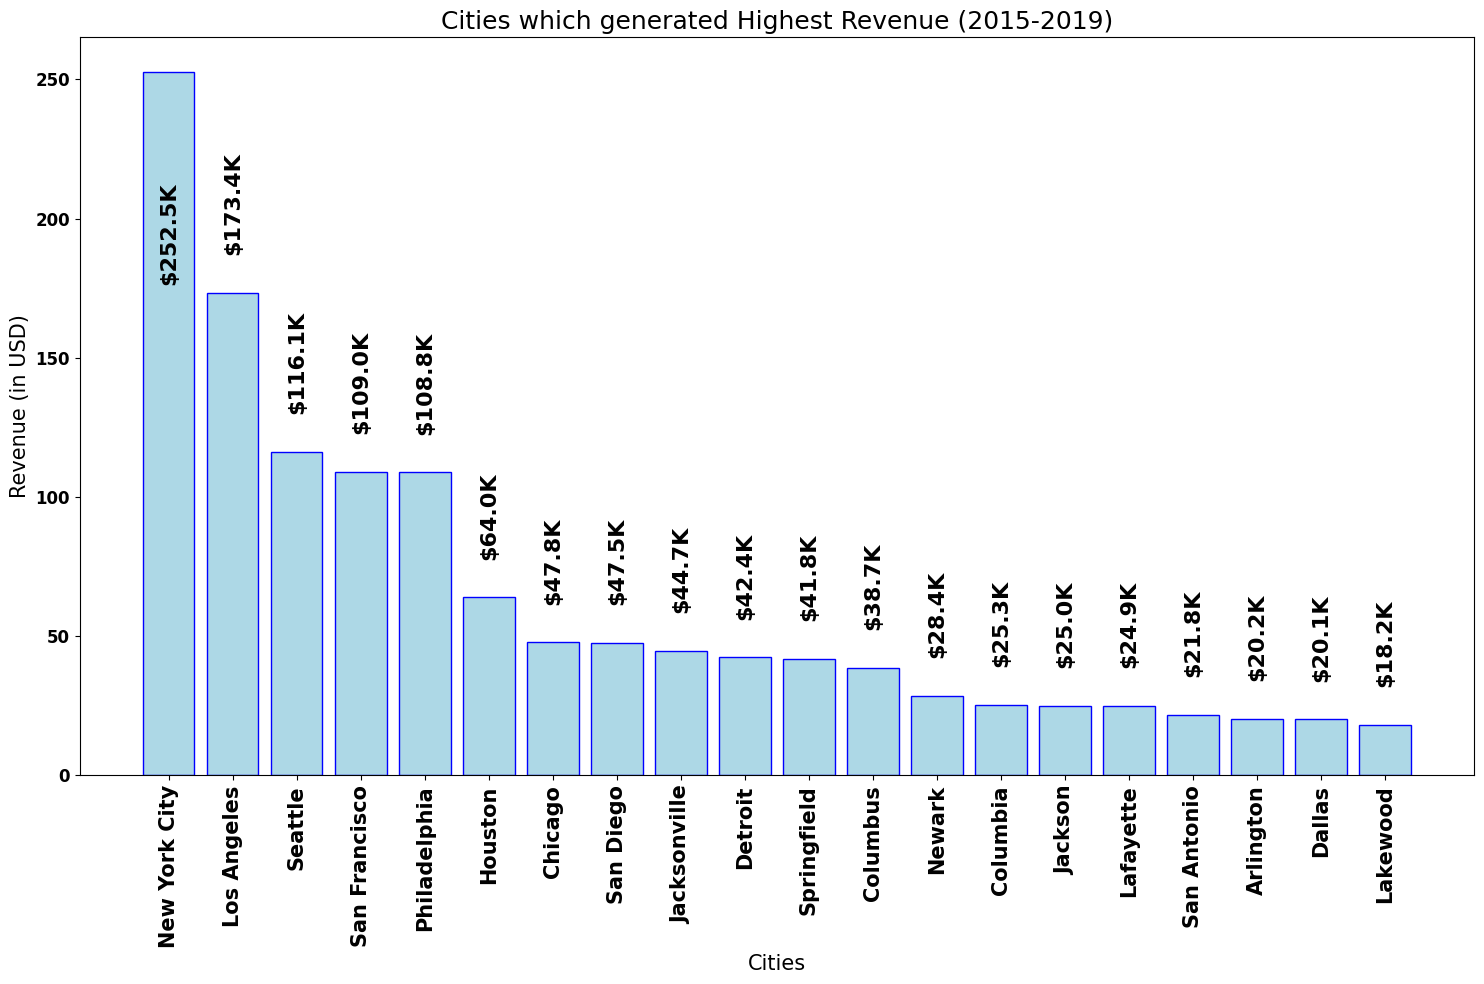

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Set the title and axis labels with font sizes
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.xlabel("Cities", fontsize=15)
plt.ylabel("Revenue (in USD)", fontsize=15)

# Create a bar chart with named colors
plt.bar(Top_cities["City"], Top_cities["Sales"] / 1000, color='lightblue', edgecolor='blue', linewidth=1)

# Customize the tick labels
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=12)

# Add revenue values on each bar in thousands (K)
for city, revenue in Top_cities["Sales"].items():
    revenue_k = revenue / 1000  # Convert revenue to thousands
    offset = -75 if revenue > 250000 else 15  # Adjust offset for K-scale
    plt.text(city, revenue_k + offset, f'${revenue_k:.1f}K', fontsize=16, rotation=90, ha='center', color='black')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

Let's look at the revenue generated by each category!

We can see that Category - Technology generated the highest revenue of about $827426!

The Total Revenue generated by all the categories - $2261536!

Let's look at the revenue generated by each Sub-Category

In [53]:
new_df = pd.DataFrame(df['Sales'])
new_df

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


In [54]:
new_df =  pd.DataFrame(new_df['Sales'].resample('D').mean())
new_df = new_df.interpolate(method='linear')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


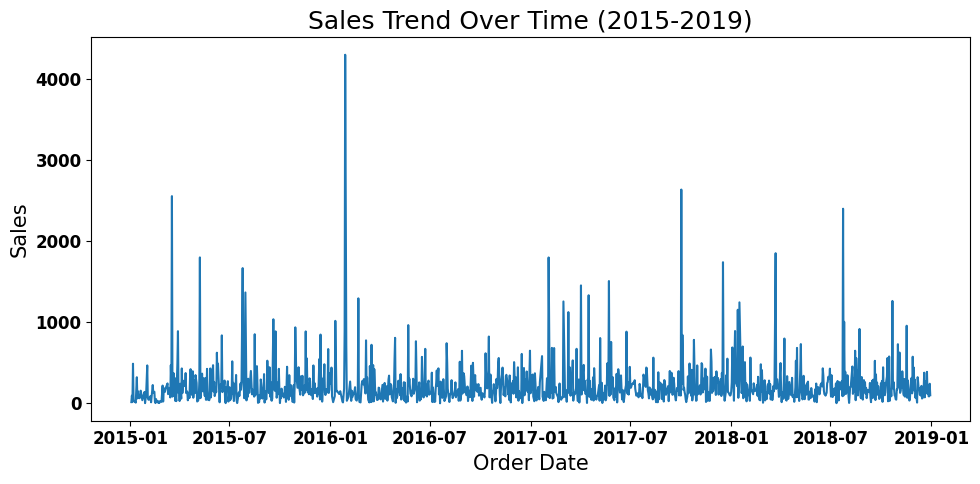

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the line chart
sns.lineplot(data=new_df, x=new_df.index, y=new_df['Sales'])

# Add title and axis labels
plt.title("Sales Trend Over Time (2015-2019)", fontsize=18)
plt.xlabel("Order Date", fontsize=15)
plt.ylabel("Sales", fontsize=15)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

01:07:26 - cmdstanpy - INFO - Chain [1] start processing
01:07:28 - cmdstanpy - INFO - Chain [1] done processing


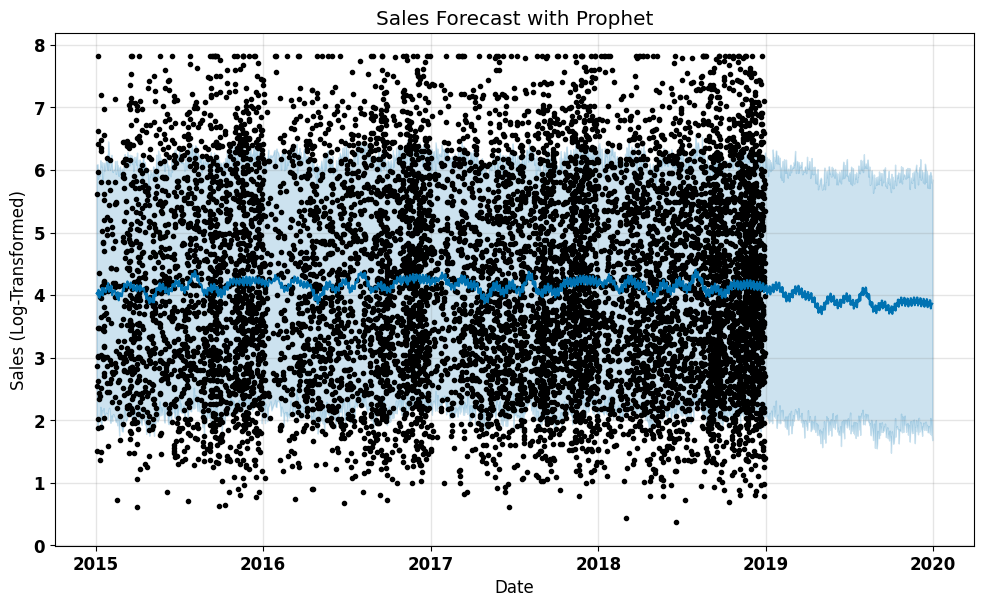

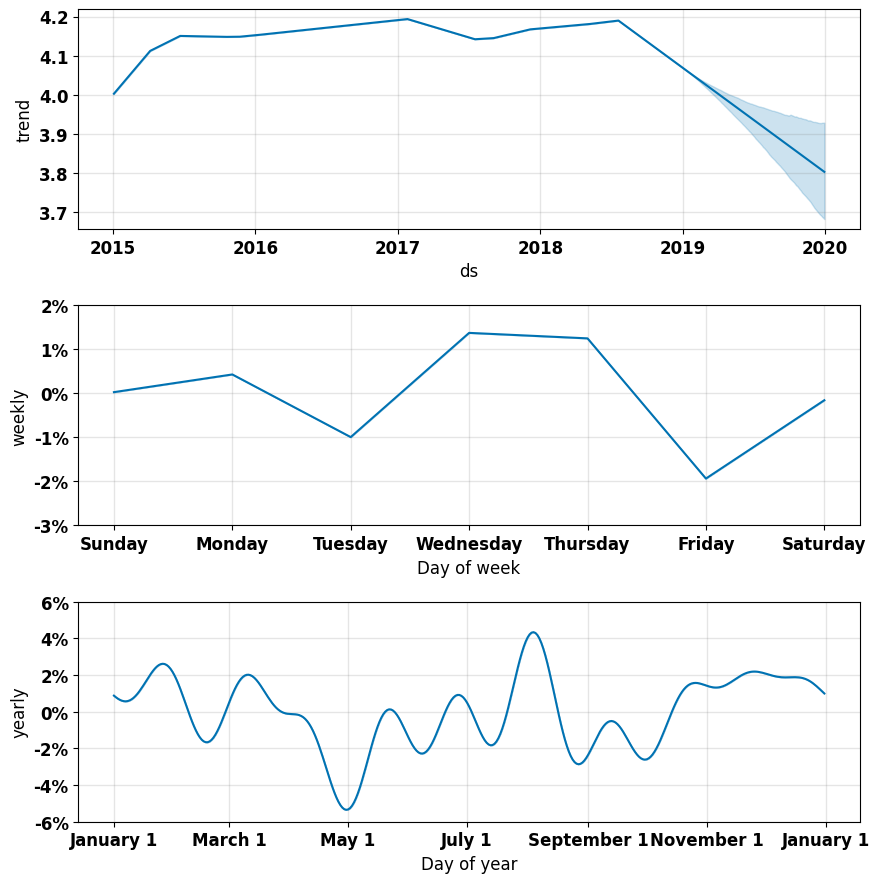

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

# Convert Order Date to datetime and rename columns for Prophet
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Step 1: Outlier removal - Capping extreme values
# Define a threshold at the 99th percentile to cap outliers
threshold = df['y'].quantile(0.99)
df['y'] = df['y'].apply(lambda x: min(x, threshold))

# Step 2: Log Transformation to stabilize variance
df['y'] = np.log1p(df['y'])  # log1p is log(x+1), to handle zero values

# Initialize the Prophet model with some hyperparameter tuning
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5  
)

# Fit the model to the preprocessed data
model.fit(df)

# Step 3: Make future dataframe and forecast
future = model.make_future_dataframe(periods=365)  # Forecast for the next 365 days
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales (Log-Transformed)')

fig2 = model.plot_components(forecast)

plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

forecast_df = forecast[['ds', 'yhat']].merge(df[['ds', 'y']], on='ds', how='inner')

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(forecast_df['y'], forecast_df['yhat']))

print(f'RMSE: {rmse:.2f}')

RMSE: 1.58
